In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import matplotlib.ticker as ticker
from cycler import cycle

%matplotlib widget

In [2]:
Ts = np.linspace(20, 100, 5)
x = np.linspace(0, 10, 10)
ys = [np.exp(-(x-2)/3) + (np.random.rand(x.size)-0.5)*0.3 for T in Ts]
fits = [np.exp(-(x-2)/3) for T in Ts]

X, Y = np.meshgrid(np.linspace(0, 10, 30), np.linspace(0, 5, 50))
M = np.exp(-np.sqrt((X-2)**2 + (Y-3)**2))

In [3]:
colors = mpl.cm.inferno(np.linspace(0, 0.8, len(ys))) # avoid yellow due to visibility
markers = cycle(['o', 's', '^', 'v', 'p', '<', '>', 'h'])

<ipython-input-4-687219cfa7af>:21: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  art = ax1.pcolormesh(X, Y, M, vmin=0, vmax=0.5)


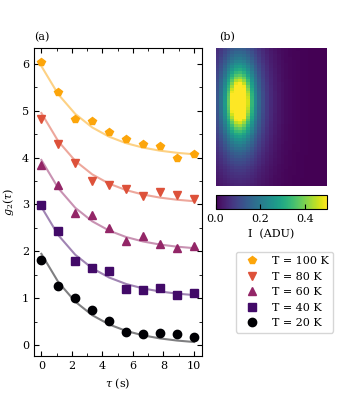

In [4]:
fig = plt.figure(figsize=(3+3/8, 4))

gs = GridSpec(3,2, width_ratios=[1.2,0.8], height_ratios=[1,0.1,1])

ax0 = plt.subplot(gs[:,0])

offsets = np.arange(len(Ts)) * 1
for y, fit, T, offset, color, marker in zip(ys, fits, Ts, offsets, colors, markers):
    ax0.plot(x, fit + offset, '-', color=color, alpha=0.5)
    ax0.plot(x, y + offset, color=color, marker=marker, linestyle='None', label="T = {:.0f} K".format(T))
    
ax0.set_xlabel(r'$\tau$ (s)')
ax0.set_ylabel(r'$g_2(\tau)$')

ax0.xaxis.set_major_locator(ticker.MultipleLocator(2))
ax0.xaxis.set_minor_locator(ticker.AutoMinorLocator(2))
ax0.yaxis.set_minor_locator(ticker.AutoMinorLocator(2))


ax1 = plt.subplot(gs[0,1])
art = ax1.pcolormesh(X, Y, M, vmin=0, vmax=0.5)
ax1.set_axis_off()
ax1.xaxis.set_minor_locator(ticker.AutoMinorLocator(2))

ax2 = plt.subplot(gs[1,1])
cb = plt.colorbar(art, cax=ax2, orientation="horizontal")
cb.set_label('I  (ADU)')
cb.set_ticks(ticker.MultipleLocator(0.2))


ax3 = plt.subplot(gs[2,1])
handles, labels = ax0.get_legend_handles_labels()
ax3.axis('off')
ax3.legend(handles[::-1], labels[::-1], bbox_to_anchor=(1.1,0.8))

fig.text(0.1, 0.9, '(a)')
fig.text(0.65, 0.9, '(b)')

fig.subplots_adjust(wspace=0.1, hspace=0.1, left=0.1, right=0.97)
fig.savefig('ex_01_multipanel_colorplot.pdf', dpi=1200)